---
<a name='title'></a>
# **<font color="#8397df"> Modelación Climática Tropical </font>**
### **<font color="#e7a4d10"> Precipitación Climatológica en GPCC </font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [6]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

In [7]:
def mapa_MC(data,levels,ccmap,titulo,extend='both',cbarlabel='pr  [mm día$^{-1}$]',limite_NS=75):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    ax.set_extent([0,359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=12)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

In [8]:
# Archivo de precipitación GPCC
filename='/home/jovyan/ModClim/datos_actualizados/precip.comb.v2020to2019-v2020monitorafter.total.nc'
ds=xr.open_dataset(filename)
pr=ds['precip']
pr

<xarray.DataArray 'precip' (time: 1610, lat: 180, lon: 360)> Size: 417MB
[104328000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 13kB 1891-01-01 1891-02-01 ... 2025-02-01
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    long_name:     GPCC Monthly total of precipitation
    statistic:     Total
    valid_range:   [   0. 8000.]
    parent_stat:   Observations
    var_desc:      Precipitation
    units:         mm
    level:         Surface
    dataset:       GPCC Precipitation 1.0degree V2020 Full Reanalysis
    actual_range:  [   0.   4830.39]

In [9]:
# Convertimos las unidades
pr=pr/30.5
pr['units']='mm day-1'
pr.units

<xarray.DataArray 'units' ()> Size: 32B
array('mm day-1', dtype='<U8')
Coordinates:
    units    <U8 32B 'mm day-1'

In [10]:
pr.lat

<xarray.DataArray 'lat' (lat: 180)> Size: 720B
array([ 89.5,  88.5,  87.5,  86.5,  85.5,  84.5,  83.5,  82.5,  81.5,  80.5,
        79.5,  78.5,  77.5,  76.5,  75.5,  74.5,  73.5,  72.5,  71.5,  70.5,
        69.5,  68.5,  67.5,  66.5,  65.5,  64.5,  63.5,  62.5,  61.5,  60.5,
        59.5,  58.5,  57.5,  56.5,  55.5,  54.5,  53.5,  52.5,  51.5,  50.5,
        49.5,  48.5,  47.5,  46.5,  45.5,  44.5,  43.5,  42.5,  41.5,  40.5,
        39.5,  38.5,  37.5,  36.5,  35.5,  34.5,  33.5,  32.5,  31.5,  30.5,
        29.5,  28.5,  27.5,  26.5,  25.5,  24.5,  23.5,  22.5,  21.5,  20.5,
        19.5,  18.5,  17.5,  16.5,  15.5,  14.5,  13.5,  12.5,  11.5,  10.5,
         9.5,   8.5,   7.5,   6.5,   5.5,   4.5,   3.5,   2.5,   1.5,   0.5,
        -0.5,  -1.5,  -2.5,  -3.5,  -4.5,  -5.5,  -6.5,  -7.5,  -8.5,  -9.5,
       -10.5, -11.5, -12.5, -13.5, -14.5, -15.5, -16.5, -17.5, -18.5, -19.5,
       -20.5, -21.5, -22.5, -23.5, -24.5, -25.5, -26.5, -27.5, -28.5, -29.5,
       -30.5, -31.5, -32.5, -33.5, -34.5, -35.5, -36.5, -37.5, -38.5, -39.5,
       -40.5, -41.5, -42.5, -43.5, -44.5, -45.5, -46.5, -47.5, -48.5, -49.5,
       -50.5, -51.5, -52.5, -53.5, -54.5, -55.5, -56.5, -57.5, -58.5, -59.5,
       -60.5, -61.5, -62.5, -63.5, -64.5, -65.5, -66.5, -67.5, -68.5, -69.5,
       -70.5, -71.5, -72.5, -73.5, -74.5, -75.5, -76.5, -77.5, -78.5, -79.5,
       -80.5, -81.5, -82.5, -83.5, -84.5, -85.5, -86.5, -87.5, -88.5, -89.5],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
    units    <U8 32B 'mm day-1'
Attributes:
    units:               degrees_north
    actual_range:        [-89.5  89.5]
    long_name:           Latitude
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  point

In [11]:
pr_years = pr.sel(time=slice('1982', '2024'))

In [12]:
jjas = pr_years.where((pr.time.dt.month >= 6) & (pr_years.time.dt.month <= 9), drop=True)
jjas

<xarray.DataArray 'precip' (time: 172, lat: 180, lon: 360)> Size: 45MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1982-06-01 1982-07-01 ... 2024-09-01
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    units    <U8 32B 'mm day-1'

In [13]:
# Seleccionamos el área específica 
area = jjas.sel(lat=slice(33.25,9.25))
arealon = area.sel(lon=slice(242, 275.75))

In [14]:
# Seleccionamos la segunda área específica 
#area2 = jjas.sel(lat=slice(33.25,10.25))
#arealon2 = area.sel(lon=slice(242, 275))

In [15]:
mean_precipitation_obs = arealon.groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).values

In [16]:
arealon=arealon.where(arealon<1e10,drop=True)
arealon

<xarray.DataArray 'precip' (time: 172, lat: 24, lon: 34)> Size: 561kB
array([[[6.39344305e-02, 3.21311466e-02, 3.93442623e-03, ...,
         3.02393460e+00, 3.12065578e+00, 3.13016391e+00],
        [           nan, 1.34426225e-02, 1.96721312e-03, ...,
         3.36819673e+00, 4.09344244e+00, 3.55540991e+00],
        [           nan, 2.52459012e-02, 1.37704918e-02, ...,
         5.37508202e+00, 5.62327862e+00, 6.01180315e+00],
        ...,
        [           nan,            nan,            nan, ...,
         6.89672136e+00, 9.88000011e+00, 8.36393452e+00],
        [           nan,            nan,            nan, ...,
                    nan, 8.85049152e+00, 9.88360691e+00],
        [           nan,            nan,            nan, ...,
                    nan, 4.92196703e+00, 9.43639374e+00]],

       [[0.00000000e+00, 2.55409837e-01, 3.11475396e-01, ...,
         4.75672150e+00, 4.54131126e+00, 5.19114780e+00],
        [           nan, 1.77377045e-01, 6.60327852e-01, ...,
         6.85278654e+00, 6.29901600e+00, 7.53540993e+00],
        [           nan, 3.18032801e-02, 1.80327863e-01, ...,
         9.35901642e+00, 1.03937712e+01, 8.84032822e+00],
...
        [           nan,            nan,            nan, ...,
         2.73573780e+00, 5.47639322e+00, 9.58885193e+00],
        [           nan,            nan,            nan, ...,
                    nan, 7.70196724e+00, 1.09580326e+01],
        [           nan,            nan,            nan, ...,
                    nan, 9.67508221e+00, 9.73377037e+00]],

       [[4.32786904e-02, 2.00983614e-01, 1.45573765e-01, ...,
         3.72065592e+00, 5.84196711e+00, 8.28655720e+00],
        [           nan, 1.65245906e-01, 3.81639361e-01, ...,
         4.80163908e+00, 7.31836081e+00, 9.70098400e+00],
        [           nan, 1.80983603e-01, 3.43934417e-01, ...,
         8.50459099e+00, 1.34049187e+01, 1.18009834e+01],
        ...,
        [           nan,            nan,            nan, ...,
         8.98950768e+00, 9.32819748e+00, 9.59737682e+00],
        [           nan,            nan,            nan, ...,
                    nan, 1.19727869e+01, 1.27170486e+01],
        [           nan,            nan,            nan, ...,
                    nan, 1.36813116e+01, 1.40996723e+01]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1982-06-01 1982-07-01 ... 2024-09-01
  * lat      (lat) float32 96B 32.5 31.5 30.5 29.5 28.5 ... 12.5 11.5 10.5 9.5
  * lon      (lon) float32 136B 242.5 243.5 244.5 245.5 ... 273.5 274.5 275.5
    units    <U8 32B 'mm day-1'

In [17]:
mean_precipitation_obs = arealon.groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).values

In [18]:
mean_jjas = arealon.mean('time')

In [19]:
lats=mean_jjas.lat
lons=mean_jjas.lon

In [20]:
from cartopy.util import add_cyclic_point
data, lon = add_cyclic_point(mean_jjas, coord=lons)

In [21]:
print(lons.shape)
print(mean_jjas.shape)

(34,)
(24, 34)


In [22]:
# Guardamos los datos seleccionados JJAS en un archivo NetCDF
#mean_jjas.to_netcdf('GPCC_actualizado_ClimJJAS.nc')

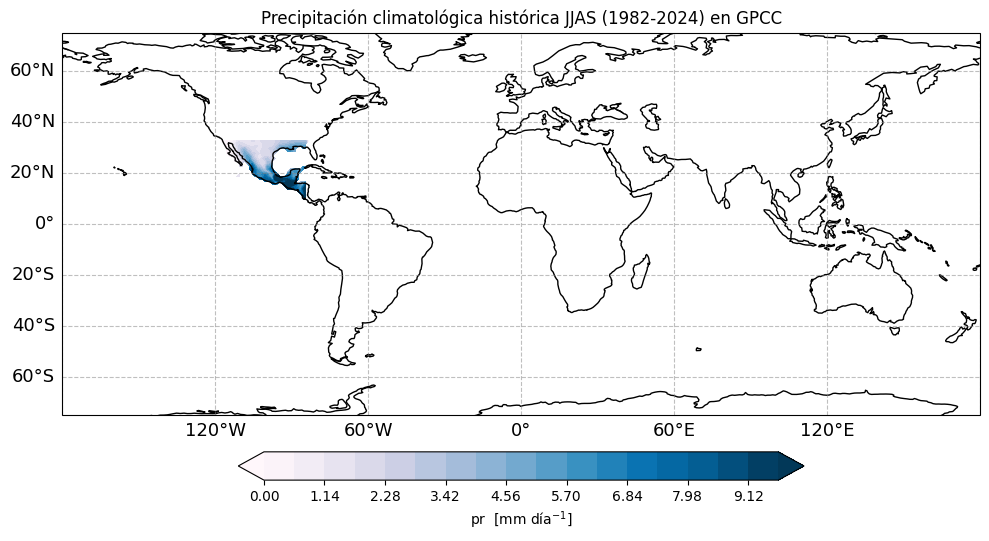

In [23]:
mapa_MC(mean_jjas,np.arange(0,10,0.57),'PuBu','Precipitación climatológica histórica JJAS (1982-2024) en GPCC')

In [24]:
# La siguiente es la función modificada para poner manualmente las coordenadas al llamarla para graficar
def mapa_MC(data, levels, ccmap, titulo, extend='both', cbarlabel='pr  [mm día$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    # plot de contorno, extend con max y no both
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())
    
    # Definimos la extensión del mapa
    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo, fontsize=19)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

In [25]:
# Imprimimos valores mínimos y máximos de la precipitación en todo el dominio de México
print(np.nanmin(mean_jjas), np.nanmax(mean_jjas))

0.038450293 13.045663


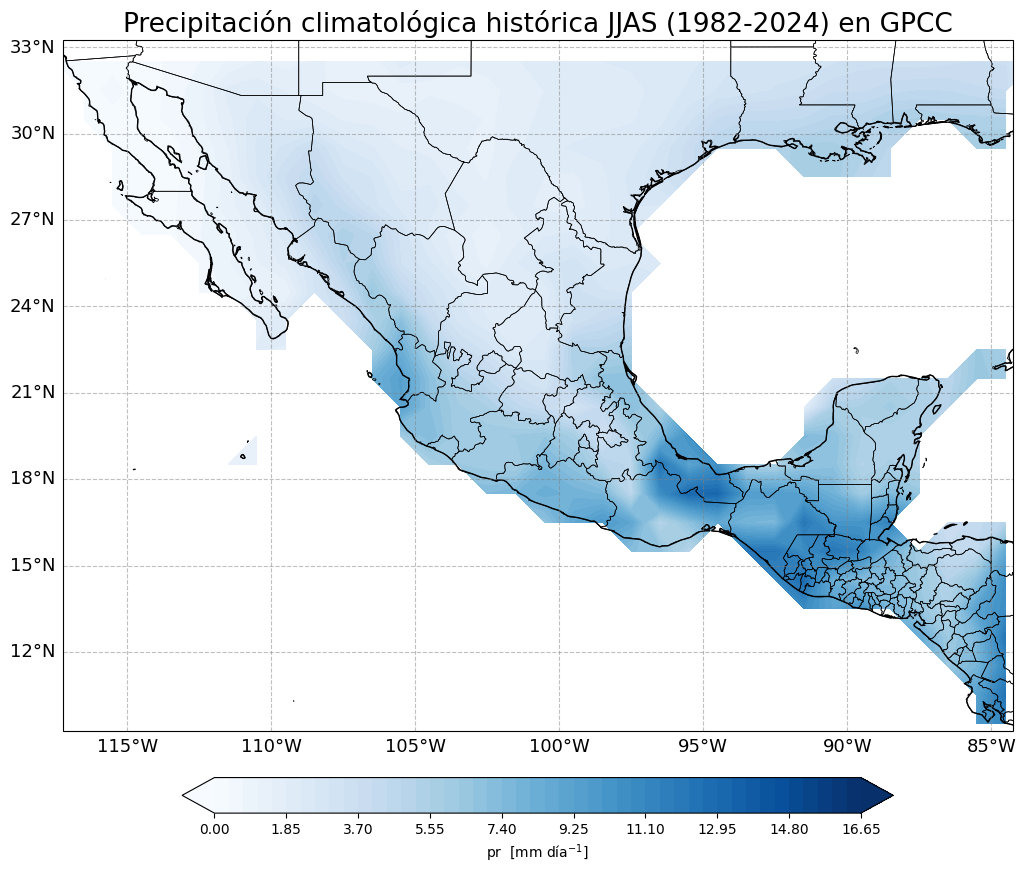

In [26]:
mapa_MC(mean_jjas, np.arange(0,17,0.37), 'Blues', 'Precipitación climatológica histórica JJAS (1982-2024) en GPCC'
        , lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)